In [1]:
import arrow
import numpy as np
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt



In [9]:
# functions

to_date = lambda d : arrow.get(d)

def days_until(end_date):
    end_date = to_date(end_date)
    def fn(d):
        d = to_date(d)
        return (d - end_date).days
    return fn

def date_to_str(s):
    s = to_date(s)
    s = s.format('DDMMYYYY')
    return s
datum = lambda d : d.format('DD.MM.YYYY')

def date_parts(s): 
    s = date_to_str(s)
    s = [s[:2],s[2:4],s[4:6],s[6:]]
    s = np.array(s)
    return s

def quersumme(s):
    s = str(s)
    return sum(map(int, list(s)))

def lebenszahl(s):
    s = date_to_str(s)
    summe = quersumme(s)
    while summe >= 10:
        summe = quersumme(summe)
    return summe

def paarsumme(ich, anderer):
    split = lambda x : (x // 100, x % 100)
    parts = lambda s : np.vectorize(int)(np.split(np.array(list(s)), 4)).T
    multiply = lambda xi : xi[0] * 10 + xi[1]
    
    ich = multiply(parts(date_to_str(ich)))
    anderer = multiply(parts(date_to_str(anderer)))
    
    summe = ich + anderer
    summe = split(summe)
    summe = np.concatenate((summe[0], [0])), np.concatenate(([0], summe[1]))
    summe = summe[0] + summe[1]
    summe = np.sum(summe)
    
#    summe = map(split, get_nums(parts(date_to_str(ich))) + get_nums(parts(date_to_str(anderer))))
    return int(summe)

def line(d, ich=arrow.now()):
    return (d, days_until('00010101')(d), datum(d), lebenszahl(d), datum(ich), lebenszahl(ich), paarsumme(ich, d))

In [3]:
class DateIter:
    def __init__(self, end_date, start_date='0001-01-01'):
        self._end_date = arrow.get(end_date)
        self._current = arrow.get(start_date)
        
    def __iter__(self):
        return self
    
    def __next__(self):
        if not self._current > self._end_date:
            out = self._current
            self._current = self._current.shift(days=+1)
            return out
        else:
            raise StopIteration


In [15]:
ich = '1984-06-28'
anderer = '1992-12-07'
ich = to_date(ich)
anderer = to_date(anderer)

#ich, heute, anderer, heute   anderer, ich
auswertung = pd.DataFrame(np.array([line(ich),   line(anderer),   line(anderer, ich)])[:,1:], columns=['tage bis heute vom 1.1.0001', 'anderer' ,'lebenszahl anderer', 'ich', 'lebenszahl ich', 'paar summe'])
auswertung

,tage bis heute vom 1.1.0001,anderer,lebenszahl anderer,ich,lebenszahl ich,paar summe
0,724454,28.06.1984,2,05.04.2022,6,89
1,727538,07.12.1992,4,05.04.2022,6,82
2,727538,07.12.1992,4,28.06.1984,2,168


In [5]:
dates = [ d for d in DateIter(ich) ]


In [6]:
out = [ line(d) for d in dates ]

In [7]:
out = np.array(out)[:, 1:]

In [8]:
df = pd.DataFrame(out, columns=['datum', 'tage', 'lebenszahl', 'paarsumme'])

/home/jbc/.cache/pypoetry/virtualenvs/quersumme-KKD6wYbz-py3.9/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
/run/user/1000/ipykernel_5206/1573020371.py:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_layout" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('paarsumme.png', tight_layout=True)


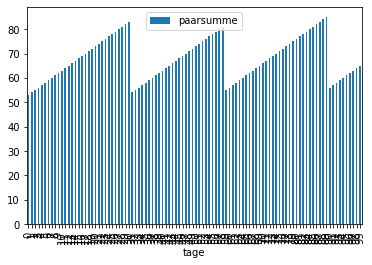

In [9]:
ax = df[:100].plot.bar(x='tage', y='paarsumme')
plt.savefig('paarsumme.png', tight_layout=True)

In [10]:
len(out)

724455

In [16]:
paarsumme = df[df['paarsumme'] == 168]
paarsumme = df[-10:]

In [17]:
len(paarsumme)

10

In [18]:
paarsumme

,datum,tage,lebenszahl,paarsumme
724445,19.06.1984,724445,2,79
724446,20.06.1984,724446,3,80
724447,21.06.1984,724447,4,81
724448,22.06.1984,724448,5,82
724449,23.06.1984,724449,6,83
724450,24.06.1984,724450,7,84
724451,25.06.1984,724451,8,85
724452,26.06.1984,724452,9,86
724453,27.06.1984,724453,1,87
724454,28.06.1984,724454,2,88


In [14]:
df.to_csv('data/alle_daten.csv')
paarsumme.to_csv('data/paarsumme.csv')

In [15]:
df[:10]

,datum,tage,lebenszahl,paarsumme
0,01.01.0001,0,3,53
1,02.01.0001,1,4,54
2,03.01.0001,2,5,55
3,04.01.0001,3,6,56
4,05.01.0001,4,7,57
5,06.01.0001,5,8,58
6,07.01.0001,6,9,59
7,08.01.0001,7,1,60
8,09.01.0001,8,2,61
9,10.01.0001,9,3,62
